# **QOSF Screening Task** **2**  
#### Implementing a circuit that returns |01> and |10> with equal probability (50% for each), with simulated noise, and parameters obtained via Gradient Descent.


### Installing Requirements
For circuit implementation and visualization we have installed qiskit. 
For finding right sets of parameters (theta and phi) using gradient descsent, we have installed pennylane and its qiskit plugin pennylane-qiskit.
We then independently install Qiskit alongwith its visualization libraries.

In [ ]:
!pip install pennylane
!pip install pennylane-qiskit
!pip install qiskit[visualization]

     |████████████████████████████████| 317kB 2.9MB/s 
     |████████████████████████████████| 26.0MB 165kB/s 
     |████████████████████████████████| 8.3MB 41.0MB/s 
     |████████████████████████████████| 16.5MB 247kB/s 
     |████████████████████████████████| 174kB 47.5MB/s 
     |████████████████████████████████| 174kB 45.7MB/s 
     |████████████████████████████████| 1.9MB 40.5MB/s 
     |████████████████████████████████| 1.1MB 41.1MB/s 
     |████████████████████████████████| 5.8MB 42.0MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 296kB 45.0MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 583kB 37.3MB/s 
     |████████████████████████████████| 102kB 10.1MB/s 
     |████████████████████████████████| 2.6MB 41.1MB/s 
  Created wheel for qiskit: filename=qiskit-0.21.0-cp36-none-any.whl size=2875 sha256=283441eae42be0dcd4860f21991ba06cd95b865017c492229fce51421aca8018
  Stored in di

In [ ]:
import pennylane as qml
from pennylane import numpy as np

In [ ]:
dev = qml.device("default.qubit", analytic=True, wires=2)

### Gradient Descent
As per the given task wherein we were asked to build a circuit which gives an equal probability of |01> + |10> states using CNOT, RX and RY gates, a circuit has been made here with random states.

This circuit is used to implement gradient descent in order to find the optimal parameters.
PauliZ is used to provide the circuit with expected values to enable optimisation ahead.

In [ ]:
@qml.qnode(dev)
def circuit(params):
    qml.RX(params[0], wires=[0])
    qml.CNOT(wires=[0, 1])
    qml.RY(params[1], wires=[0])
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0))

In [ ]:
print(circuit([0.54, 0.12]))

0.8515405859048367


In [ ]:
print(circuit.draw())

 0: ──RX(0.54)──╭C──RY(0.12)──╭C──┤ ⟨Z⟩ 
 1: ────────────╰X────────────╰X──┤     



In [ ]:
def cost(x):
    return circuit(x)

In [ ]:
init_params = np.array([0.011, 0.012])
print(cost(init_params))

0.9998675058299389


Implementing the GradentDescentOptimizer function on the circuit parameters.

In [ ]:
# initialise the optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.4)

# set the number of steps
steps = 100
# set the initial parameter values
params = init_params

for i in range(steps):
    # update the circuit parameters
    params = opt.step(cost, params)

    if (i + 1) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(params)))

print("Optimized rotation angles: {}".format(params))

Cost after step     5:  0.9961778
Cost after step    10:  0.8974944
Cost after step    15:  0.1440490
Cost after step    20: -0.1536720
Cost after step    25: -0.9152496
Cost after step    30: -0.9994046
Cost after step    35: -0.9999964
Cost after step    40: -1.0000000
Cost after step    45: -1.0000000
Cost after step    50: -1.0000000
Cost after step    55: -1.0000000
Cost after step    60: -1.0000000
Cost after step    65: -1.0000000
Cost after step    70: -1.0000000
Cost after step    75: -1.0000000
Cost after step    80: -1.0000000
Cost after step    85: -1.0000000
Cost after step    90: -1.0000000
Cost after step    95: -1.0000000
Cost after step   100: -1.0000000
Optimized rotation angles: [8.14739648e-17 3.14159265e+00]


After GradientDescent optimizer, we got our required parameters in radiants 
that is theta(8.14739648e-17) which is tending to zero and phi(3.14159265e+00) which is tending to pi.

We have used those parameters in the above circuit that returns |01> and |10> with equal probability.  
### Circuit Implementation

In [ ]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)



The required circuit is structured as follows:


*   First Rx gate is used in qubit 0 that results in state |01> at a phase angle of (0) with 100% probability.
*   Following which a CNOT gate was applied, whose controll is given to qubit0 and the target is qubit 1. 
The purpose of using the CNOT gate was to flip the state of qubit 1.
The result of which is state vector |11> at a phase angle of (3*pi/2).

*   After that Ry is apllied to qubit 0 that results in two state vectors |10> +|11>. Since Ry is applied to qubit 0, the probabilty that q0 is in |1> is 50% and after applying CNOT, the probability of q1 to be in |1> is 100%.
*   At last, to get the desired output of equal probabilities of states |01> + |10>, a CNOT gate is applied to q0 with the control to q0 and traget to q1. Since the previous operation had made equal probailities of sates |0> and |1> in q0, the probabilities of states |0> and |1> in q1 will also be equal. And the final result will be |01> and |10> of equal probailities at phase angles of (pi/2) and (3*pi/2) respectively.

In [ ]:
circuit.rx(pi, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.ry(pi/2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

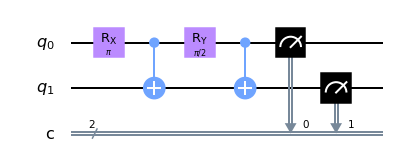

In [ ]:
circuit.draw('mpl')

### Measuring on multiple shots (measurements)
Using Qiskit visualization to plot the probabilities of the two state vectors |01> + |10> for different measurement counts (shots): 1, 10, 100, 1000.

In [ ]:
result1 = execute(circuit, simulator, shots=1).result()
result2 = execute(circuit, simulator, shots=10).result()
result3 = execute(circuit, simulator, shots=100).result()
result4 = execute(circuit, simulator, shots=1000).result()

counts1 = result1.get_counts(circuit)
counts2 = result2.get_counts(circuit)
counts3 = result3.get_counts(circuit)
counts4 = result4.get_counts(circuit)

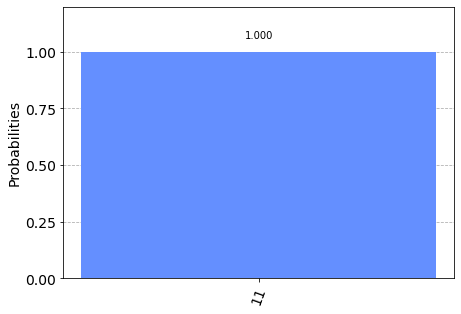

In [ ]:
plot_histogram(counts1)

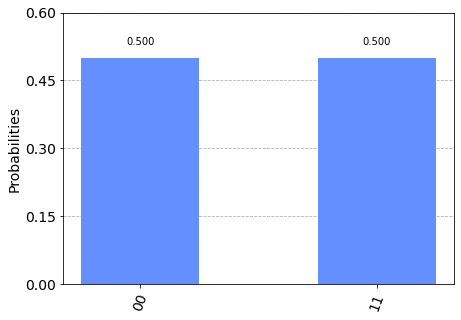

In [ ]:
plot_histogram(counts2)

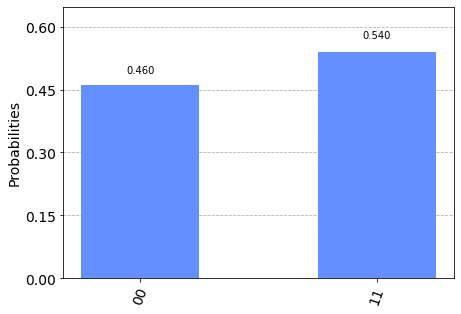

In [ ]:
plot_histogram(counts3)

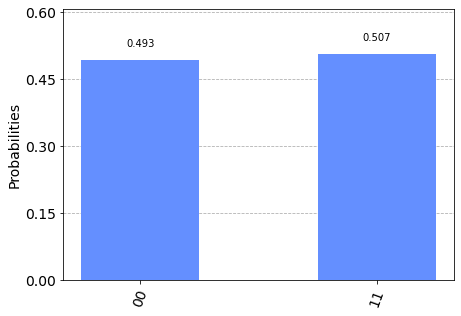

In [ ]:
plot_histogram(counts4)

### Noise Simulation
- Noise is simulated in this circuit using Qiskit's FakeVigo data.
- A noise model is built on the backend device FakeVigo, which loads the noise data required for simulation.
- The circuit is then executed with this noise model.
- Errors occurring due to the simulated noise are then visualised via a histogram.

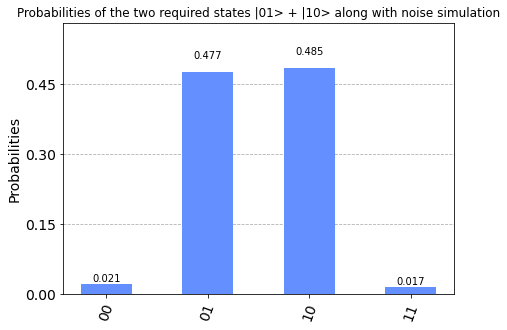

In [ ]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.test.mock import FakeVigo
device_backend = FakeVigo()

# The device coupling map is needed for transpiling to correct
# CNOT gates before simulation
coupling_map = device_backend.configuration().coupling_map
noise_model = NoiseModel.from_backend(device_backend)
basis_gates = noise_model.basis_gates
result_noise = execute(circuit, simulator,
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates
                       ).result()
counts_noise = result_noise.get_counts(circuit)
plot_histogram(counts_noise,title="Probabilities of the two required states |01> + |10> along with noise simulation")

### Conclusion
A quantum circuit with the required probabilities and states is thus attained using Gradient Descent on Pennylane, and Measurements, Noise Simulation, and Visualization on Qiskit.

### References


- https://pennylane.ai/qml/demos/tutorial_qubit_rotation.html
- https://pennylane.readthedocs.io/en/stable/introduction/circuits.html

- https://quantum-computing.ibm.com/
- https://qiskit.org/textbook/preface.html

- https://qiskit.org/documentation/tutorials/simulators/2_device_noise_simulation.html   
- https://pennylane.readthedocs.io/en/stable/introduction/measurements.html







